##  Data Visualization

##### Let's explore our dataset

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sb
%matplotlib inline

In [23]:
df = pd.read_csv('bikeshare_2019.csv')

In [57]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [59]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [62]:
df.drop(columns = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], inplace=True)

KeyError: "['start_station_latitude' 'start_station_longitude' 'end_station_latitude'\n 'end_station_longitude'] not found in axis"

In [103]:
a = df.duration_sec.sort_values(ascending=False)
a = a/60
a.loc[a>60].shape

(1710,)

In [105]:
df.drop( df.loc[df['duration_sec'] > 3600 ].index , inplace=True  )

In [110]:
df.describe()
#df.bike_id.astype('str')

,duration_sec,start_station_id,end_station_id,bike_id,member_birth_year
count,181702.000000,181509.000000,181509.000000,181702.000000,173757.000000
mean,623.698567,138.503369,136.021580,4475.159685,1984.811674
std,449.443392,111.532825,111.180213,1662.768598,10.114858
min,61.000000,3.000000,3.000000,11.000000,1878.000000
25%,323.000000,47.000000,44.000000,3786.000000,1980.000000
50%,510.000000,104.000000,100.000000,4958.000000,1987.000000
75%,785.000000,239.000000,233.000000,5502.000000,1992.000000
max,3596.000000,398.000000,398.000000,6645.000000,2001.000000


In [114]:
df.bike_id = df.bike_id.astype('str')
df.start_station_id = df.start_station_id.astype('str')
df.end_station_id = df.end_station_id.astype('str')

In [117]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 181702 entries, 4 to 183411
Data columns (total 12 columns):
duration_sec               181702 non-null int64
start_time                 181702 non-null object
end_time                   181702 non-null object
start_station_id           181702 non-null object
start_station_name         181509 non-null object
end_station_id             181702 non-null object
end_station_name           181509 non-null object
bike_id                    181702 non-null object
user_type                  181702 non-null object
member_birth_year          173757 non-null float64
member_gender              173757 non-null object
bike_share_for_all_trip    181702 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 18.0+ MB


In [123]:
a = df.member_birth_year.sort_values(ascending=True)

In [132]:
a.loc[a<1950].shape

(671,)

In [134]:
df.drop( df.loc[df['member_birth_year'] < 1950 ].index , inplace=True  )

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181031 entries, 4 to 183411
Data columns (total 12 columns):
duration_sec               181031 non-null int64
start_time                 181031 non-null object
end_time                   181031 non-null object
start_station_id           181031 non-null object
start_station_name         180838 non-null object
end_station_id             181031 non-null object
end_station_name           180838 non-null object
bike_id                    181031 non-null object
user_type                  181031 non-null object
member_birth_year          173086 non-null float64
member_gender              173086 non-null object
bike_share_for_all_trip    181031 non-null object
dtypes: float64(1), int64(1), object(10)
memory usage: 18.0+ MB


# Kinds of plots
Now we shall explore some of the plots we can use to understand our data better.

- Univariate Plots
- Bivariate Plots
- MultiVariate Plots
Let's walk through each one in more details

## Univariate plots
This kind of plots is usually used for visualizing data distributions, and outliers.  
- Bar Plot
- Pie Chart
- Histogram

#### Bar Plot : Categorical variables
Let's say that we want to know the distribution of data over a certain categorical feature.  
In the following cell, we'll use seaborn countplot to do so.  
[seaborn.countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html#seaborn.countplot)

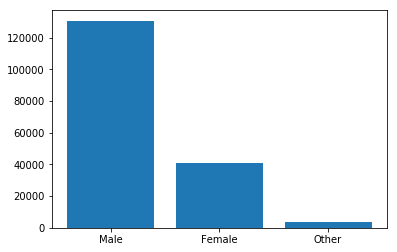

In [25]:
freq = df['member_gender'].value_counts() # To order the bars, often used with nominal variables

plt.bar(freq.index, freq);

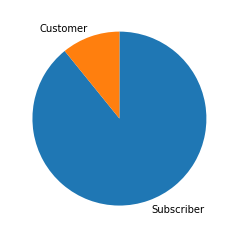

In [29]:
sorted_counts = df['user_type'].value_counts()

plt.pie(sorted_counts, labels = [str(x) for x in sorted_counts.index], startangle = 90, counterclock = False);

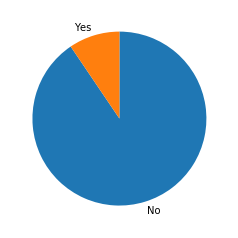

In [30]:
sorted_counts = df['bike_share_for_all_trip'].value_counts()

plt.pie(sorted_counts, labels = [str(x) for x in sorted_counts.index], startangle = 90, counterclock = False);

In [31]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


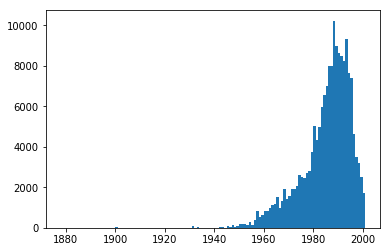

In [39]:
bins = np.arange(df['member_birth_year'].min(), df['member_birth_year'].max()+1, 1)
plt.hist(data = df, x = 'member_birth_year', bins = bins);

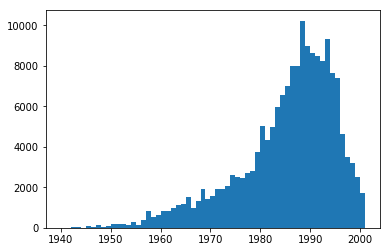

In [40]:
bins = np.arange(1940, df['member_birth_year'].max()+1, 1)
plt.hist(data = df, x = 'member_birth_year', bins = bins);

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


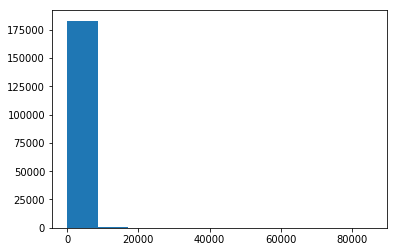

In [56]:
#bins = np.arange(df['duration_sec'].min()/60, df['duration_sec'].max()/60, 1)
plt.hist(data = df, x = 'duration_sec');
df.describe()
df.drop( df.loc[df['duration_sec'] == 85444].index )

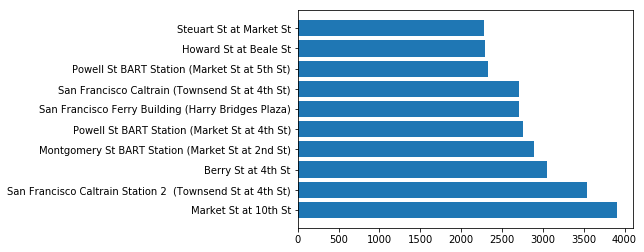

In [44]:
freq = df['start_station_name'].value_counts()
plt.barh(freq.index[0:10], freq[0:10]);

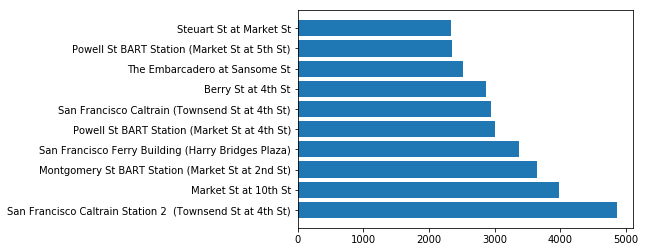

In [45]:
freq = df['end_station_name'].value_counts()
plt.barh(freq.index[0:10], freq[0:10]);